In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_city = pd.merge(city_data, ride_data, how= 'outer', on= 'city')

# Display the data table for preview
ride_city.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Obtain the x and y coordinates for each of the three city types

city_group = ride_city.groupby("city")
Avg_fare_city = city_group['fare'].mean()
No_of_rides_city = city_group['ride_id'].count()
no_of_drivers_city = city_group['driver_count'].sum()
city_type = city_group['type'].first()
summary_city = pd.DataFrame({"Driver count": no_of_drivers_city, "Average fare": Avg_fare_city,
                            "Number of rides": No_of_rides_city, "City type": city_type})
summary_city.head()


,Driver count,Average fare,Number of rides,City type
city,,,,
Amandaburgh,216,24.641667,18,Urban
Barajasview,572,25.332273,22,Urban
Barronchester,176,36.422500,16,Suburban
Bethanyland,396,32.956111,18,Suburban
Bradshawfurt,70,40.064000,10,Rural


## Bubble Plot of Ride Sharing Data

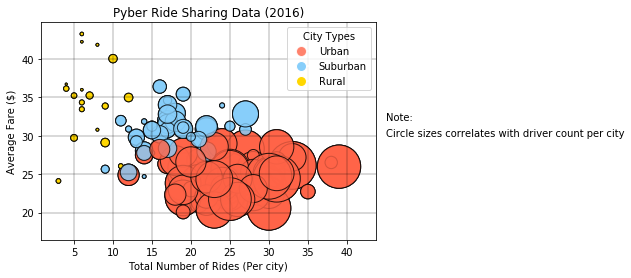

In [3]:

# Build the scatter plots for each city types

for x in ['Urban', 'Suburban', 'Rural']:
    colors = {'Urban':'tomato', 'Suburban':'lightskyblue', 'Rural':'gold'}
    plt.scatter(summary_city["Number of rides"], (summary_city["Average fare"]), 
            s=summary_city["Driver count"], edgecolors='black', alpha=0.8, label=None,
            c=summary_city['City type'].apply(lambda x: colors[x]))


# Incorporate the other graph properties
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare ($)")


# Create a legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Urban'
                          ,markerfacecolor='tomato', markersize=10, alpha=0.8),
                   Line2D([0], [0], marker='o', color='w', label='Suburban'
                          ,markerfacecolor='lightskyblue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Rural'
                          ,markerfacecolor='gold', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right',title = "City Types")

# Incorporate a text label regarding circle size
plt.text(45, 32, 'Note: ', fontsize=10)
plt.text(45, 30, 'Circle sizes correlates with driver count per city', fontsize=10)
# Save Figure
plt.savefig("Images/Rides_by_city_bubble.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

## Total Fares by City Type

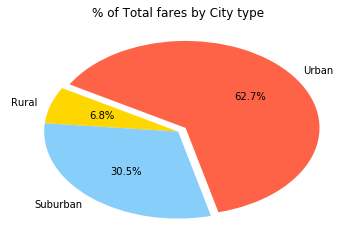

In [4]:
# Calculate Type Percents
city_group2 = ride_city.groupby("type").agg({'fare':'sum'})
city_group2["city_type"] = city_group2.index
city_type2 = city_group2["city_type"]
total_fare = city_group2["fare"]

# Build Pie Chart
colors = ["gold","lightskyblue","tomato"]
explode = (0, 0, 0.07)
plt.pie(total_fare, explode=explode, labels=city_type2, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=150)
plt.title("% of Total fares by City type")

# Save Figure
plt.savefig("Images/total_Fares.png",dpi=300, bbox_inches = "tight")
# Show Figure
plt.show()

## Total Rides by City Type

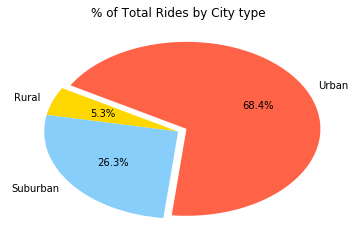

In [5]:
# Calculate Type Percents
city_group3 = ride_city.groupby("type").agg({'ride_id':'count'})
city_group3["city_type"] = city_group3.index
city_type3 = city_group3["city_type"]
total_ride = city_group3["ride_id"]

# Build Pie Chart
colors = ["gold","lightskyblue","tomato"]
explode = (0, 0, 0.07)

plt.pie(total_ride, explode=explode, labels=city_type3, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=150)
plt.title("% of Total Rides by City type")

# Save Figure
plt.savefig("Images/total_Rides.png",dpi=300, bbox_inches = "tight")

# Show Figure
plt.show()

## Total Drivers by City Type

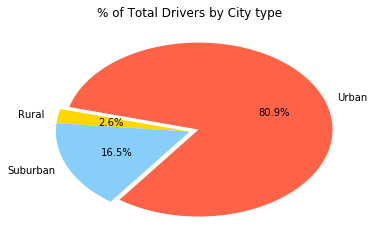

In [6]:
# Calculate Type Percents
drivers = ride_city.groupby('city').agg({'driver_count':'max', 'type': 'max'})
drivers.apply(pd.Series)
drivers_final = drivers.groupby('type').agg({'driver_count':'sum'})

drivers_final["city_type"] = drivers_final.index
city_type4 = drivers_final["city_type"]
All_drivers = drivers_final["driver_count"]



# Build Pie Chart
colors = ["gold","lightskyblue","tomato"]
explode = (0, 0, 0.07)

plt.pie(All_drivers, explode=explode, labels=city_type4, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=165)
plt.title("% of Total Drivers by City type")


# Save Figure
plt.savefig("Images/total_Drivers.png",dpi=300, bbox_inches = "tight")

# Show Figure
plt.show()